# Imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import random
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,140.766120


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  log_price  53940 non-null  float64
 11  volume     53940 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 4.9+ MB


# Data Preprocessing
**Converting categorical features into numerical type by assigning values to the categories**

In [4]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
df['cut']=df['cut'].map({'Ideal':1,'Premium':2,'Good': 3,'Very Good':4, 'Fair':5})

In [6]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,2,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,2,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,115.920000
53936,0.72,3,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,118.110175
53937,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,114.449728
53938,0.86,2,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,140.766120


In [7]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [8]:
df['color']=df['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})

In [9]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
df['clarity']=df['clarity'].map({'SI1':7,'SI2':6,'VS1':5,'VS2':4,'VVS1':3,'VVS2':2,'IF':1})

In [11]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,volume
0,0.23,1,6,6.0,61.5,55.0,326,3.95,3.98,2.43,5.786897,38.202030
1,0.21,2,6,7.0,59.8,61.0,326,3.89,3.84,2.31,5.786897,34.505856
2,0.23,3,6,5.0,56.9,65.0,327,4.05,4.07,2.31,5.789960,38.076885
3,0.29,2,2,4.0,62.4,58.0,334,4.20,4.23,2.63,5.811141,46.724580
4,0.31,3,1,6.0,63.3,58.0,335,4.34,4.35,2.75,5.814131,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,7.0,60.8,57.0,2757,5.75,5.76,3.50,7.921898,115.920000
53936,0.72,3,7,7.0,63.1,55.0,2757,5.69,5.75,3.61,7.921898,118.110175
53937,0.70,4,7,7.0,62.8,60.0,2757,5.66,5.68,3.56,7.921898,114.449728
53938,0.86,2,3,6.0,61.0,58.0,2757,6.15,6.12,3.74,7.921898,140.766120


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  int64  
 2   color      53940 non-null  int64  
 3   clarity    53199 non-null  float64
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  log_price  53940 non-null  float64
 11  volume     53940 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 4.9 MB


**Handling missing values**

In [13]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,741
depth,0
table,0
price,0
x,0
y,0
z,0


In [14]:
df.skew()

,0
carat,1.116646
cut,0.579876
color,-0.189366
clarity,-0.421259
depth,-0.082294
table,0.796896
price,1.618395
x,0.378676
y,2.434167
z,1.522423


**Since the skewness of 'clarity' is between -1 and 1, I have taken the integer vallue of the mean.**

In [16]:
df['clarity']=df['clarity'].fillna(int(df['clarity'].mean()))

<Axes: >

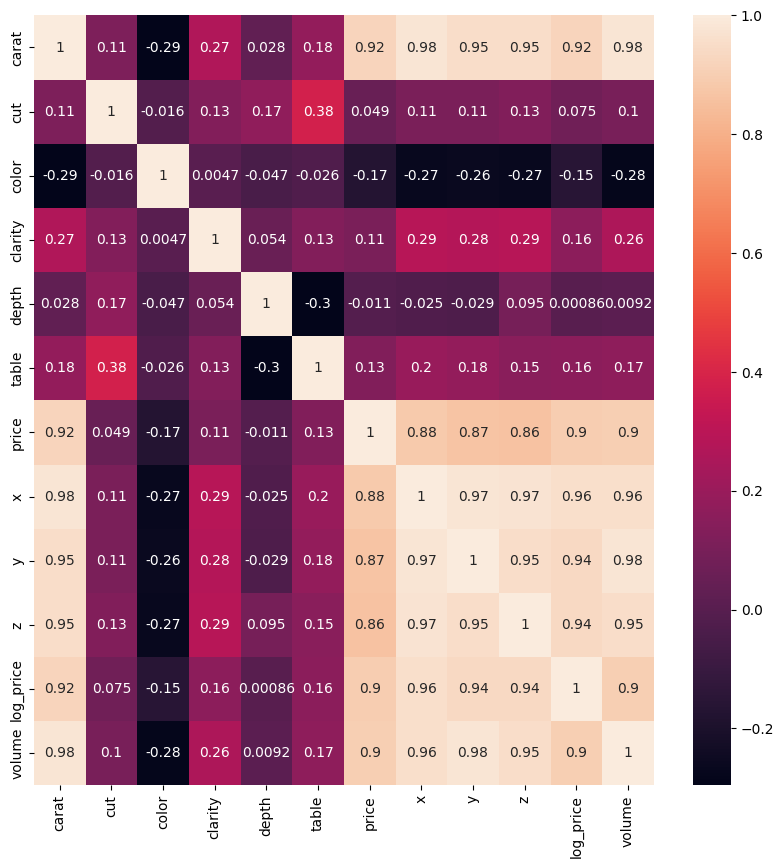

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='price'>

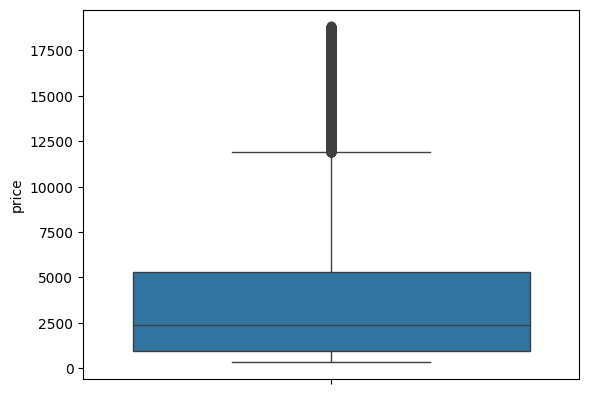

In [17]:
sns.boxplot(df['price'])

# Model Training

In [18]:
y=df['price']
x=df.drop('price',axis=1)

In [19]:
x

,carat,cut,color,clarity,depth,table,x,y,z,log_price,volume
0,0.23,1,6,6.0,61.5,55.0,3.95,3.98,2.43,5.786897,38.202030
1,0.21,2,6,7.0,59.8,61.0,3.89,3.84,2.31,5.786897,34.505856
2,0.23,3,6,5.0,56.9,65.0,4.05,4.07,2.31,5.789960,38.076885
3,0.29,2,2,4.0,62.4,58.0,4.20,4.23,2.63,5.811141,46.724580
4,0.31,3,1,6.0,63.3,58.0,4.34,4.35,2.75,5.814131,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,7.0,60.8,57.0,5.75,5.76,3.50,7.921898,115.920000
53936,0.72,3,7,7.0,63.1,55.0,5.69,5.75,3.61,7.921898,118.110175
53937,0.70,4,7,7.0,62.8,60.0,5.66,5.68,3.56,7.921898,114.449728
53938,0.86,2,3,6.0,61.0,58.0,6.15,6.12,3.74,7.921898,140.766120


**Polynomial Feature with degree 2**

In [39]:
poly=PolynomialFeatures(degree=2)
x=poly.fit_transform(x)

In [41]:
x

array([[1.00000000e+00, 1.00000000e+00, 2.30000000e-01, ...,
        4.88724876e+04, 3.22630265e+05, 2.12983405e+06],
       [1.00000000e+00, 1.00000000e+00, 2.10000000e-01, ...,
        3.98728403e+04, 2.37752010e+05, 1.41765718e+06],
       [1.00000000e+00, 1.00000000e+00, 2.30000000e-01, ...,
        4.86042199e+04, 3.19639037e+05, 2.10206262e+06],
       ...,
       [1.00000000e+00, 1.00000000e+00, 7.00000000e-01, ...,
        8.22030757e+05, 1.18760923e+07, 1.71576996e+08],
       [1.00000000e+00, 1.00000000e+00, 8.60000000e-01, ...,
        1.24352585e+06, 2.20965102e+07, 3.92638209e+08],
       [1.00000000e+00, 1.00000000e+00, 7.50000000e-01, ...,
        9.73810868e+05, 1.53127569e+07, 2.40786514e+08]])

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [44]:
y_train

,price
26546,16231
9159,4540
14131,5729
15757,6300
24632,12968
...,...
11284,4975
44732,1617
38158,1014
860,2871


In [67]:
y_train=np.array(y_train)
y_train

array([16231,  4540,  5729, ...,  1014,  2871,  6320])

In [46]:
x_train.shape, x_test.shape,y_train.shape

((43152, 3160), (10788, 3160), (43152,))

In [47]:
def func(x,w,b):
    return np.dot(x,w)+b

In [48]:
m=len(x_train)
def gd_lasso(x, y, w, b, alpha):
    w_grad = np.zeros_like(w)
    b_grad = 0
    for i in range(m):
        y_pred = func(x[i], w, b)
        error = y_pred - y[i]
        w_grad += error * x[i]
        b_grad += error
    w_grad /= m
    b_grad /= m

    # Lasso regularization
    for j in range(len(w)):
        if w[j] > 0:
            w_grad[j] += alpha
        elif w[j] < 0:
            w_grad[j] -= alpha

    return w_grad, b_grad

In [49]:
def gradient_descent(x, y, w, b, iters, lr, alpha):
    for i in range(iters):
        w_grad, b_grad = gd_lasso(x, y, w, b, alpha)
        w = w - lr * w_grad
        b = b - lr * b_grad
    return w, b

In [50]:
lr=0.001
alpha=0.1
iters=1000
w=np.zeros(x_train.shape[1])
b=0
w,b=gradient_descent(x_train,y_train,w,b,iters,lr,alpha)

In [53]:
w,b

(array([ 0.        ,  0.        , -6.91294169, ..., 12.46512719,
        -3.495352  , -3.87208662]),
 2490.9579982774044)

# Testing

In [54]:
y_pred=func(x_train,w,b)

In [55]:
r2=r2_score(y_train,y_pred)
r2

0.8518331776313894

In [59]:
y_predict=func(x_test,w,b)
score=r2_score(y_test,y_predict)
print(f"R2 score for testing dataset: {score}")

R2 score for testing dataset: 0.852221588174698


In [77]:
num_samples = 100
random_indices = random.sample(range(len(x_test)), num_samples)
x_random = x_test[random_indices]
y_random_pred = func(x_random, w, b)
print("Predicted Prices for Random Samples:")
y_random_pred

Predicted Prices for Random Samples:


array([ 1194.74057061,  1408.08237722,  4720.38647755,  8962.71199499,
        -289.60806692,  6151.84778988,  6600.77794841,  -689.55228009,
        1336.37457132,  -995.5672307 ,  5963.75241962,  -628.06625263,
        1688.94670905,  1807.56816483,   172.08276719,  7565.43127768,
        5835.12442926,  -275.67718849, -1242.69488723,  7669.65001943,
        -660.30254718,  -476.89481126,  -458.73020442,  4033.67679247,
         667.45246476,  4508.74946604, 12694.65015327, 14443.62677895,
        1319.45728963,  2128.38014061,  -559.75716518,  -220.72693029,
         243.36138607,  2018.38337709,  5664.71829648,  -974.72583628,
        -604.29065454, -1286.99585233,  5491.88541382,   -85.82709829,
        -555.51246443,  -343.12863839,  -966.00340048,  -545.97308677,
       12926.41227385,   236.86371102,  7759.02416066,   224.83604769,
        4068.54556478, -1007.80098203,  4125.14739559,   -28.32642562,
        4042.86546107,  6695.2177416 ,  2561.2938536 ,  -825.48313783,
      

In [81]:
random_index = random.randint(0, len(x_test) - 1)
single_diamond_features = x_test[random_index]
predicted_price = func(single_diamond_features, w, b)

print(f"Predicted price for a random diamond: ${predicted_price:.2f}")

Predicted price for a random diamond: $281.05


# Direct Method

In [80]:
regrr=LinearRegression()
regrr.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=regrr.predict(x_train)

In [75]:
r2=r2_score(y_train,y_pred)
r2

0.9999996458449523